In [1]:
from PIL import Image
import os.path, sys
from skimage.io import imread, imshow
import cv2
from skimage import data, color, feature , exposure
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
from skimage.transform import resize
from skimage.feature import hog
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns; sns.set()
import glob
import os

from _helper_functions import resize_aspect_fit , extract_surf_feat

In [2]:
path = '/Users/toothless/Downloads/Thesis/data/Train/original/_nocancer/*.bmp'
surf_ncan = extract_surf_feat(path)

In [3]:
path1 = '/Users/toothless/Downloads/Thesis/data/Train/original/cancer/*.bmp'
surf_can = extract_surf_feat(path1)

In [4]:
print(surf_ncan.shape)
print(surf_can.shape)

(6778, 150, 150, 3)
(7272, 150, 150, 3)


In [5]:
train_can , test_can = surf_can[:6544] , surf_can[6544:]
train_ncan , test_ncan = surf_ncan[:6100] , surf_ncan[6100:]

In [6]:
print(train_can.shape)
print(train_ncan.shape)
print(test_can.shape)
print(test_ncan.shape)

(6544, 150, 150, 3)
(6100, 150, 150, 3)
(728, 150, 150, 3)
(678, 150, 150, 3)


In [7]:
can_labels = np.ones(train_can.shape[0])
nocan_labels = np.zeros(train_ncan.shape[0])


#Cancatenate Features and labels
features = np.concatenate((train_can,train_ncan),axis = 0)
labels = np.concatenate((can_labels,nocan_labels) , axis = 0)

#reshape features array
features = np.reshape(features,(features.shape[0],150*150*3))

# save labels and features to dataframe and shuffle data
train_df = pd.DataFrame(features)
train_df['labels'] = labels

train_df  = train_df.sample(frac=1).reset_index(drop=True)

In [8]:
# Convert Features to Array and Save it
labels = train_df.pop('labels')
features = train_df.values

features = np.reshape(features,(features.shape[0],150,150,3))

In [ ]:
#features = features /255

In [9]:
# Save test Features
np.savez_compressed('/Users/toothless/Downloads/Thesis_Results/SURF + CNN/data/Train_SURF_v2',
                    features=features, labels=labels)

# Test Data

In [10]:
testcan_labels = np.ones(test_can.shape[0])
testnocan_labels = np.zeros(test_ncan.shape[0])


#Cancatenate Features and labels
features = np.concatenate((test_can,test_ncan),axis = 0)
labels = np.concatenate((testcan_labels,testnocan_labels) , axis = 0)

#reshape features array
features = np.reshape(features,(features.shape[0],150*150*3))

# save labels and features to dataframe and shuffle data
test_df = pd.DataFrame(features)
test_df['labels'] = labels

test_df  = test_df.sample(frac=1).reset_index(drop=True)

In [11]:
# Convert Features to Array and Save it
labels = test_df.pop('labels')
features = test_df.values

#reshape before saving
features = np.reshape(features,(features.shape[0],150,150,3))

In [12]:
#features = features /255

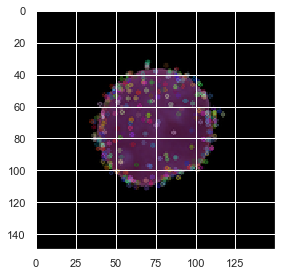

In [13]:
imshow(features[0])

In [14]:
# Save test Features
np.savez_compressed('/Users/toothless/Downloads/Thesis_Results/SURF + CNN/data/Test_SURF_v2',features=features, labels=labels)